# **Data Cleaning**

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
data = pd.read_excel('/content/ERC20_Tokens_Transaction.csv')

In [6]:
data.head()

,Transaction Hash,Status,Method,BlockNo,DateTime (UTC),From,From_Nametag,To,To_Nametag,Amount,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,0xba3c40766f6239ebccb0ea7bdcce294c2704f7d25bf0...,Success,0x771d503f,21714476,2025-01-27 07:50:11,0x51c72848c68a965f66fa7a88855f9f7784502a7f,NaN,0x11b815efb8f581194ae79006d24e0d814b7697f6,Uniswap V3: USDT 3,43.462635,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0xba3c40766f6239ebccb0ea7bdcce294c2704f7d25bf0...,Success,0x771d503f,21714476,2025-01-27 07:50:11,0x11b815efb8f581194ae79006d24e0d814b7697f6,Uniswap V3: USDT 3,0x51c72848c68a965f66fa7a88855f9f7784502a7f,NaN,133716.356490,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0xf5c1b9f4905716ae445ad5e8e51603bb328c5b41b993...,Success,0x771d503f,21714476,2025-01-27 07:50:11,0x51c72848c68a965f66fa7a88855f9f7784502a7f,NaN,0x88e6a0c2ddd26feeb64f039a2c41296fcb3f5640,Uniswap V3: USDC 3,56.989660,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0xf5c1b9f4905716ae445ad5e8e51603bb328c5b41b993...,Success,0x771d503f,21714476,2025-01-27 07:50:11,0x88e6a0c2ddd26feeb64f039a2c41296fcb3f5640,Uniswap V3: USDC 3,0x51c72848c68a965f66fa7a88855f9f7784502a7f,NaN,175242.764103,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0x8daeb683103769d86cbab2a7b54c5037e788ac0cc88a...,Success,0x2213bc0b,21714476,2025-01-27 07:50:11,0xff8ba4d1fc3762f6154cc942ccf30049a2a0cec6,NaN,0x70bf6634ee8cb27d04478f184b9b8bb13e5f4710,NaN,0.014452,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Remove empty columns between column indices 13 and 23 (0-based indexing)
columns_to_check = range(12, 23)  # Indices for columns 13 to 23
data = data.drop(columns=data.columns[columns_to_check], axis=1)

# Display the updated DataFrame
data.head()


,Transaction Hash,Status,Method,BlockNo,DateTime (UTC),From,From_Nametag,To,To_Nametag,Amount,Value (USD),Token
0,0xba3c40766f6239ebccb0ea7bdcce294c2704f7d25bf0...,Success,0x771d503f,21714476,2025-01-27 07:50:11,0x51c72848c68a965f66fa7a88855f9f7784502a7f,NaN,0x11b815efb8f581194ae79006d24e0d814b7697f6,Uniswap V3: USDT 3,43.462635,"$133,521.83",Wrapped Ether(WETH)
1,0xba3c40766f6239ebccb0ea7bdcce294c2704f7d25bf0...,Success,0x771d503f,21714476,2025-01-27 07:50:11,0x11b815efb8f581194ae79006d24e0d814b7697f6,Uniswap V3: USDT 3,0x51c72848c68a965f66fa7a88855f9f7784502a7f,NaN,133716.356490,"$133,628.37",Tether USD(USDT)
2,0xf5c1b9f4905716ae445ad5e8e51603bb328c5b41b993...,Success,0x771d503f,21714476,2025-01-27 07:50:11,0x51c72848c68a965f66fa7a88855f9f7784502a7f,NaN,0x88e6a0c2ddd26feeb64f039a2c41296fcb3f5640,Uniswap V3: USDC 3,56.989660,"$175,078.28",Wrapped Ether(WETH)
3,0xf5c1b9f4905716ae445ad5e8e51603bb328c5b41b993...,Success,0x771d503f,21714476,2025-01-27 07:50:11,0x88e6a0c2ddd26feeb64f039a2c41296fcb3f5640,Uniswap V3: USDC 3,0x51c72848c68a965f66fa7a88855f9f7784502a7f,NaN,175242.764103,"$175,242.59",USDC(USDC)
4,0x8daeb683103769d86cbab2a7b54c5037e788ac0cc88a...,Success,0x2213bc0b,21714476,2025-01-27 07:50:11,0xff8ba4d1fc3762f6154cc942ccf30049a2a0cec6,NaN,0x70bf6634ee8cb27d04478f184b9b8bb13e5f4710,NaN,0.014452,$44.40,Wrapped Ether(WETH)


In [8]:
print("Shape of the dataset: ",data.shape)
print("Columns present in the dataset: \n", data.columns, "\n")
print("Column types: \n", data.dtypes)



Shape of the dataset:  (5000, 12)
Columns present in the dataset: 
 Index(['Transaction Hash', 'Status', 'Method', 'BlockNo', 'DateTime (UTC)',
       'From', 'From_Nametag', 'To', 'To_Nametag', 'Amount', 'Value (USD)',
       'Token'],
      dtype='object') 

Column types: 
 Transaction Hash            object
Status                      object
Method                      object
BlockNo                      int64
DateTime (UTC)      datetime64[ns]
From                        object
From_Nametag                object
To                          object
To_Nametag                  object
Amount                     float64
Value (USD)                 object
Token                       object
dtype: object


In [9]:
data.describe()

,BlockNo,DateTime (UTC),Amount
count,5.000000e+03,5000,5.000000e+03
mean,2.171450e+07,2025-01-27 07:55:28.107200512,4.656558e+08
min,2.171448e+07,2025-01-27 07:50:11,2.700000e-07
25%,2.171448e+07,2025-01-27 07:50:35,2.150868e+01
50%,2.171449e+07,2025-01-27 07:53:11,8.827368e+02
75%,2.171453e+07,2025-01-27 08:00:23,2.500000e+04
max,2.171453e+07,2025-01-27 08:00:35,2.898741e+11
std,2.450619e+01,NaN,1.073969e+10


In [10]:
# Converting the Value data type from object to float for operations
data['Value (USD)'] = data['Value (USD)'].str.replace('$', '')
data['Value (USD)'] = data['Value (USD)'].str.replace(',', '').astype(float)

In [11]:
# Amount column is renamed as quantity
data.rename(columns={'Amount': 'Quantity'}, inplace=True)

# Convert datetime into datetime format
data['DateTime (UTC)'] = pd.to_datetime(data['DateTime (UTC)'])
data.dtypes

,0
Transaction Hash,object
Status,object
Method,object
BlockNo,int64
DateTime (UTC),datetime64[ns]
From,object
From_Nametag,object
To,object
To_Nametag,object
Quantity,float64


In [12]:
# Check for null values
data.isnull().sum()

,0
Transaction Hash,0
Status,0
Method,0
BlockNo,0
DateTime (UTC),0
From,0
From_Nametag,2456
To,0
To_Nametag,2711
Quantity,0


In [13]:
# Look for duplicate hashes
data['Transaction Hash'].value_counts()

,count
Transaction Hash,
0x7ec282c1bc587ea0af7ba0feec8e7773511ded31274fe63f6530985975fd1306,120
0x7fcf32b2a3bd3377025919059f8bb4a1aef7ccdf2994ecf0083deaae82cd32e8,66
0x75c712010a0a1ee437451fbef13b0c7d1a9302e378799e150b691c6268f98ae6,59
0xcc6ac5d39291ee3862de5f6f3795a3877861c573353aa398e33c0dbf6ea18236,54
0xf85dd0dc3e42ca5ba146843ad0d94acfc1441d8101327b171d722369c3324cbe,52
...,...
0x95eafc5fd289acce7500b04b22769388c1be0ff80761c417b8dabd3345c9e12a,1
0xad65ff240b606c94e049c66fa9713d83a5925ac633ffd8c2f99efa93359edf9d,1
0xaa2c159bcf589820b8c8370fcd110a8dc9f2a892bca3a22116b5efc257a7374a,1


In [14]:
# Drop the irrelevant columns such as From_Nametag and To_Nametag
data.drop(['From_Nametag', 'To_Nametag'], axis=1, inplace=True)
data.head()

,Transaction Hash,Status,Method,BlockNo,DateTime (UTC),From,To,Quantity,Value (USD),Token
0,0xba3c40766f6239ebccb0ea7bdcce294c2704f7d25bf0...,Success,0x771d503f,21714476,2025-01-27 07:50:11,0x51c72848c68a965f66fa7a88855f9f7784502a7f,0x11b815efb8f581194ae79006d24e0d814b7697f6,43.462635,133521.83,Wrapped Ether(WETH)
1,0xba3c40766f6239ebccb0ea7bdcce294c2704f7d25bf0...,Success,0x771d503f,21714476,2025-01-27 07:50:11,0x11b815efb8f581194ae79006d24e0d814b7697f6,0x51c72848c68a965f66fa7a88855f9f7784502a7f,133716.356490,133628.37,Tether USD(USDT)
2,0xf5c1b9f4905716ae445ad5e8e51603bb328c5b41b993...,Success,0x771d503f,21714476,2025-01-27 07:50:11,0x51c72848c68a965f66fa7a88855f9f7784502a7f,0x88e6a0c2ddd26feeb64f039a2c41296fcb3f5640,56.989660,175078.28,Wrapped Ether(WETH)
3,0xf5c1b9f4905716ae445ad5e8e51603bb328c5b41b993...,Success,0x771d503f,21714476,2025-01-27 07:50:11,0x88e6a0c2ddd26feeb64f039a2c41296fcb3f5640,0x51c72848c68a965f66fa7a88855f9f7784502a7f,175242.764103,175242.59,USDC(USDC)
4,0x8daeb683103769d86cbab2a7b54c5037e788ac0cc88a...,Success,0x2213bc0b,21714476,2025-01-27 07:50:11,0xff8ba4d1fc3762f6154cc942ccf30049a2a0cec6,0x70bf6634ee8cb27d04478f184b9b8bb13e5f4710,0.014452,44.40,Wrapped Ether(WETH)


In [15]:
data.describe()

,BlockNo,DateTime (UTC),Quantity,Value (USD)
count,5.000000e+03,5000,5.000000e+03,5.000000e+03
mean,2.171450e+07,2025-01-27 07:55:28.107200512,4.656558e+08,2.835333e+04
min,2.171448e+07,2025-01-27 07:50:11,2.700000e-07,0.000000e+00
25%,2.171448e+07,2025-01-27 07:50:35,2.150868e+01,1.133300e+02
50%,2.171449e+07,2025-01-27 07:53:11,8.827368e+02,9.454300e+02
75%,2.171453e+07,2025-01-27 08:00:23,2.500000e+04,7.216310e+03
max,2.171453e+07,2025-01-27 08:00:35,2.898741e+11,2.000401e+06
std,2.450619e+01,NaN,1.073969e+10,1.197719e+05


In [16]:
# Is there any transaction is failed?
data['Status'].value_counts()

,count
Status,
Success,4844
Error in Internal Txn : execution reverted,151
Error in Internal Txn : write protection,5


In [17]:
# How many methods are there?
data['Method'].value_counts()

,count
Method,
Transfer,1744
Execute,769
Swap,352
0x2213bc0b,271
0xa0000000,266
...,...
0x8100fc13,2
Verify Batches Trusted Aggregator,1
Flush,1


In [18]:
# How many unique tokens are there?
data['Token'].value_counts()

,count
Token,
Tether USD(USDT),974
Wrapped Ether(WETH),911
USDC(USDC),862
Wrapped BTC(WBTC),75
Onyxcoin(XCN),63
...,...
Entangle(NGL),1
CelerToken(CELR)﻿Transaction Hash,1
Tether Gold(XAUt)﻿Transaction Hash,1


In [19]:
 # Correlation matrix by Selecting only numerical columns
correlation_matrix = data.select_dtypes(include=['number']).corr()
print("Correlation matrix:\n", correlation_matrix)

Correlation matrix:
               BlockNo  Quantity  Value (USD)
BlockNo      1.000000 -0.040944    -0.002093
Quantity    -0.040944  1.000000     0.003750
Value (USD) -0.002093  0.003750     1.000000


In [20]:
from google.colab import files

# Save the cleaned DataFrame to a CSV file
cleaned_file_path = 'Pre_processed_ERC20_token_transaction.csv'
data.to_csv(cleaned_file_path, index=False)

# Download the CSV file to your local system
files.download(cleaned_file_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Exploratory Data Analysis (EDA)**

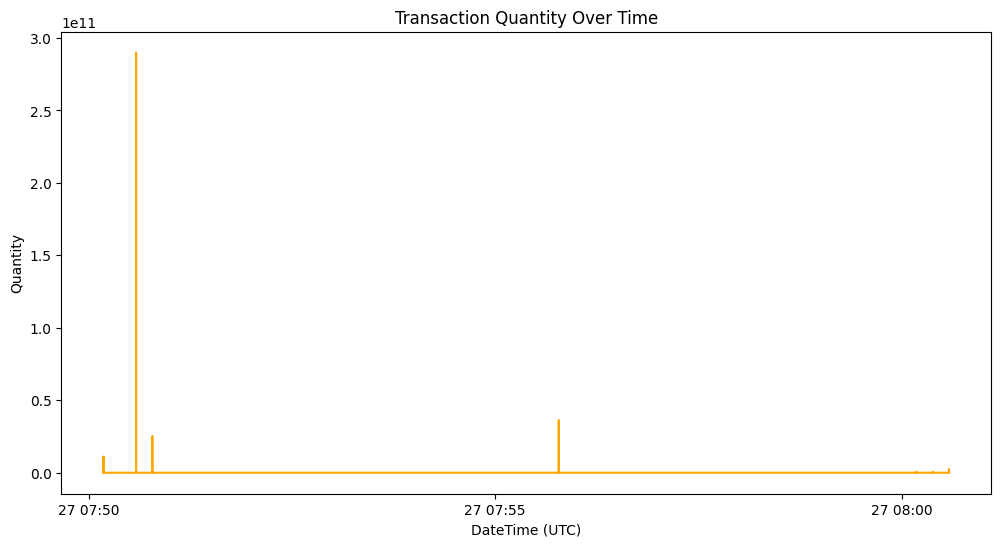

In [21]:
# Analyzing how transaction quantities vary over time

data['DateTime (UTC)'] = pd.to_datetime(data['DateTime (UTC)'])  # Ensure DateTime is in datetime format
data.sort_values(by='DateTime (UTC)', inplace=True)

plt.figure(figsize=(12, 6))
plt.plot(data['DateTime (UTC)'], data['Quantity'], color='orange')
plt.title('Transaction Quantity Over Time')
plt.xlabel('DateTime (UTC)')
plt.ylabel('Quantity')
plt.show()

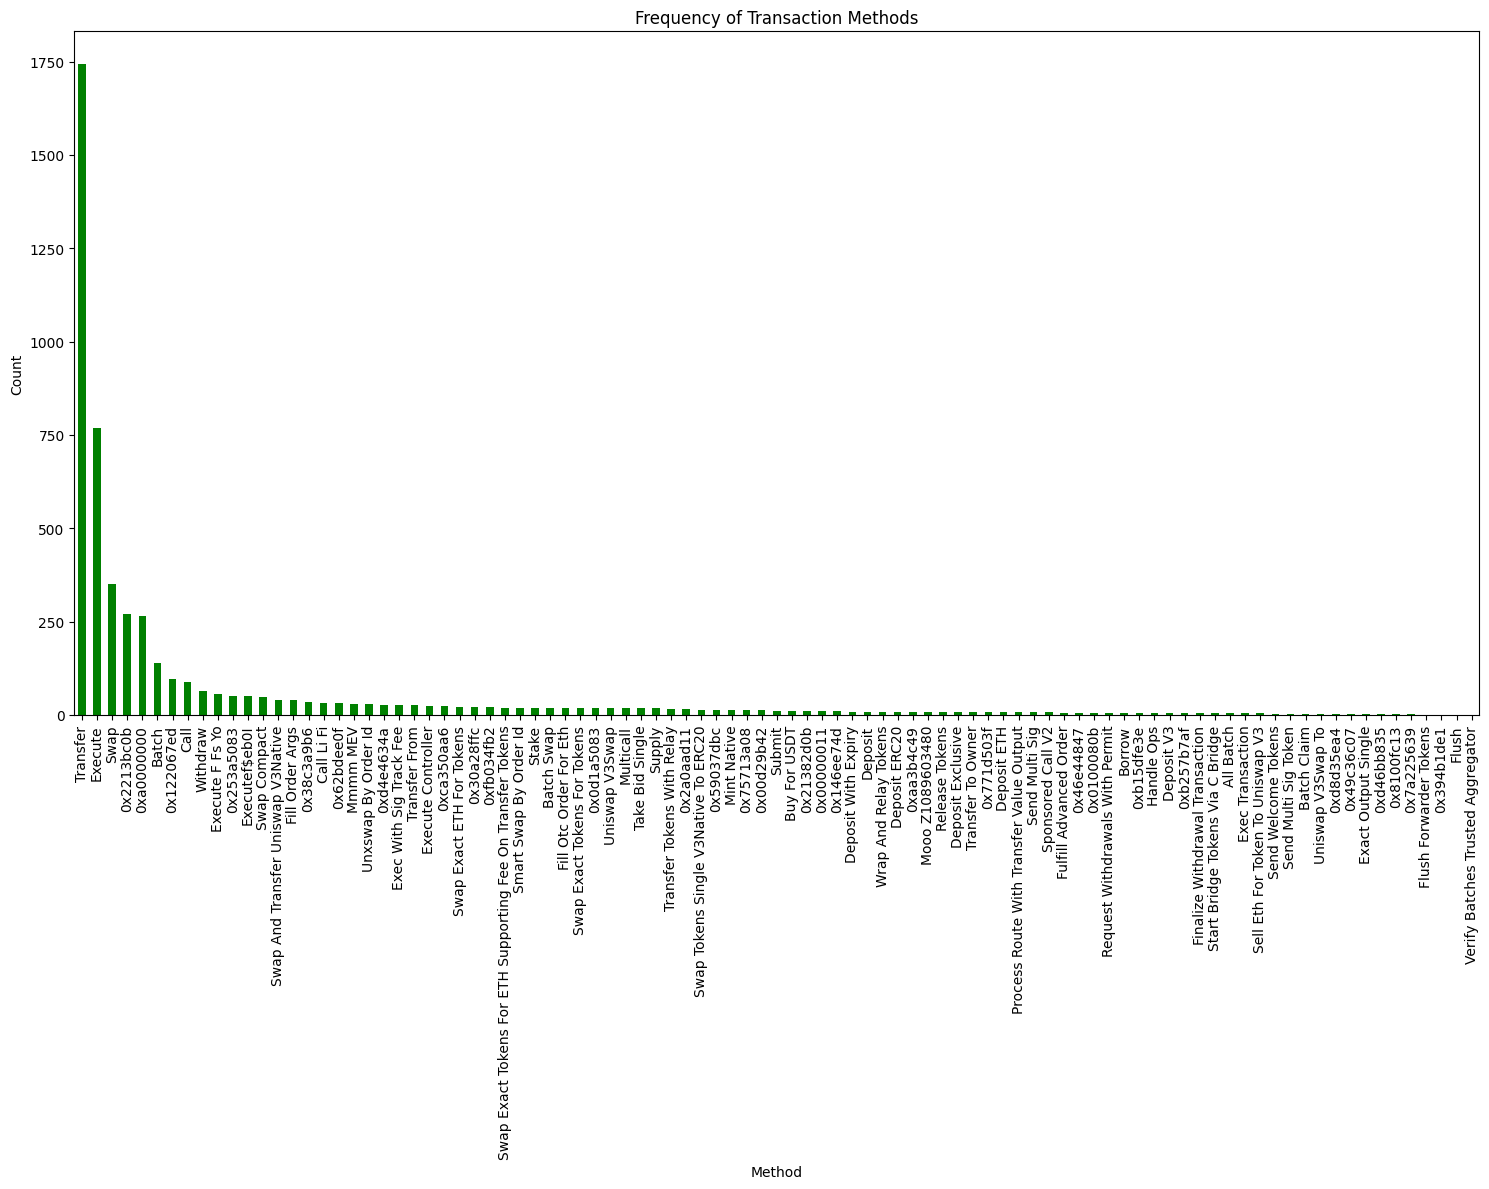

In [22]:
# Display the frequency of different transaction methods.
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
method_counts = data['Method'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(15, 12))  # Adjust the figure size
method_counts.plot(kind='bar', color='green')
plt.title('Frequency of Transaction Methods')
plt.xlabel('Method')
plt.ylabel('Count')

plt.tight_layout()  # Adjust layout to make room for rotated labels
plt.show()

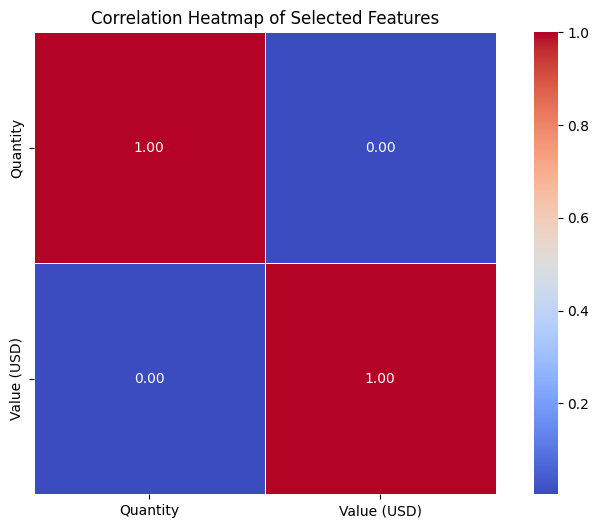

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# Select the numeric columns (Quantity, Value)
selected_columns = ['Quantity', 'Value (USD)']

# Ensure that all selected columns are numeric
for col in selected_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Drop rows with missing values (if any were introduced by coercion)
cleaned_data_for_visualization = data[selected_columns].dropna()

# Calculate the correlation matrix
correlation_matrix = cleaned_data_for_visualization.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    square=True,
    linewidths=0.5,
)
plt.title("Correlation Heatmap of Selected Features")
plt.show()


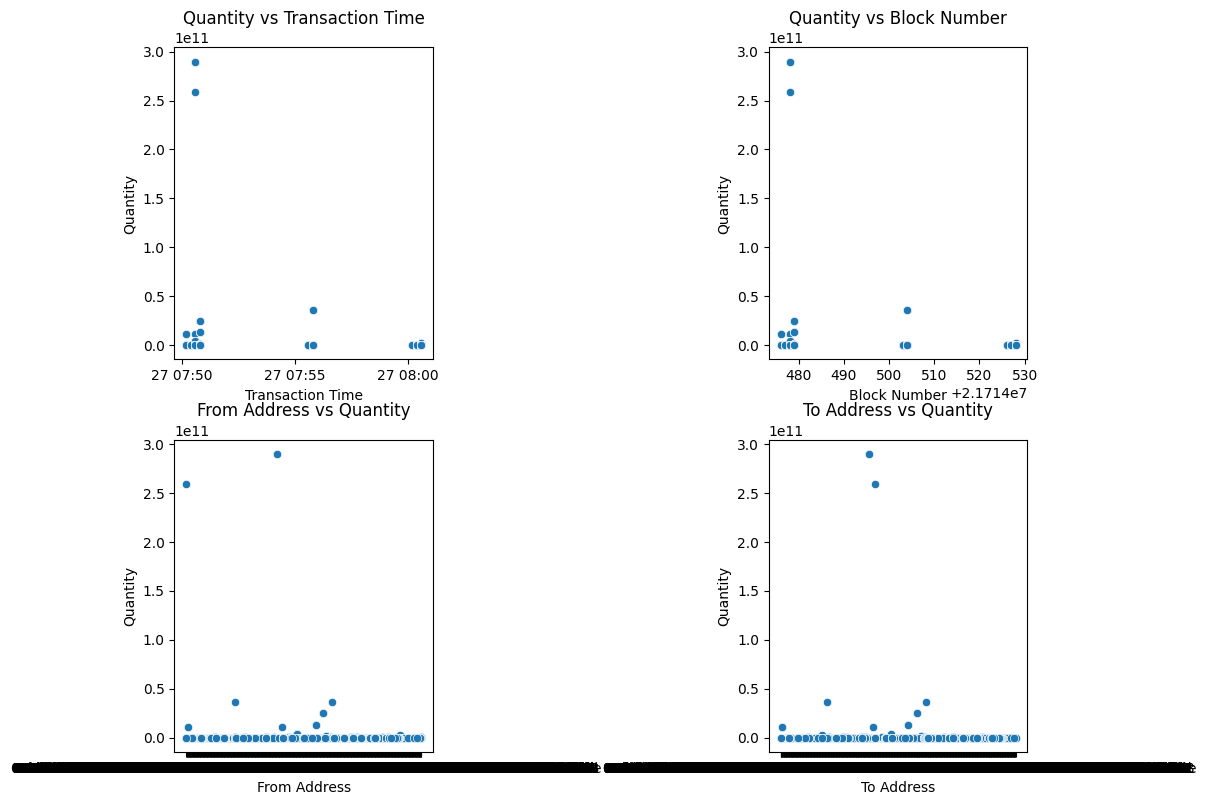

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatterplot: Quantity vs Transaction Time
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x='DateTime (UTC)', y='Quantity', data=data)
plt.title('Quantity vs Transaction Time')
plt.xlabel('Transaction Time')
plt.ylabel('Quantity')

# Scatterplot: Quantity vs Block Number
plt.subplot(2, 2, 2)
sns.scatterplot(x='BlockNo', y='Quantity', data=data)
plt.title('Quantity vs Block Number')
plt.xlabel('Block Number')
plt.ylabel('Quantity')

# Scatterplot: From Address vs Quantity
plt.subplot(2, 2, 3)
sns.scatterplot(x='From', y='Quantity', data=data)
plt.title('From Address vs Quantity')
plt.xlabel('From Address')
plt.ylabel('Quantity')

# Scatterplot: To Address vs Quantity
plt.subplot(2, 2, 4)
sns.scatterplot(x='To', y='Quantity', data=data)
plt.title('To Address vs Quantity')
plt.xlabel('To Address')
plt.ylabel('Quantity')

plt.tight_layout()
plt.show()


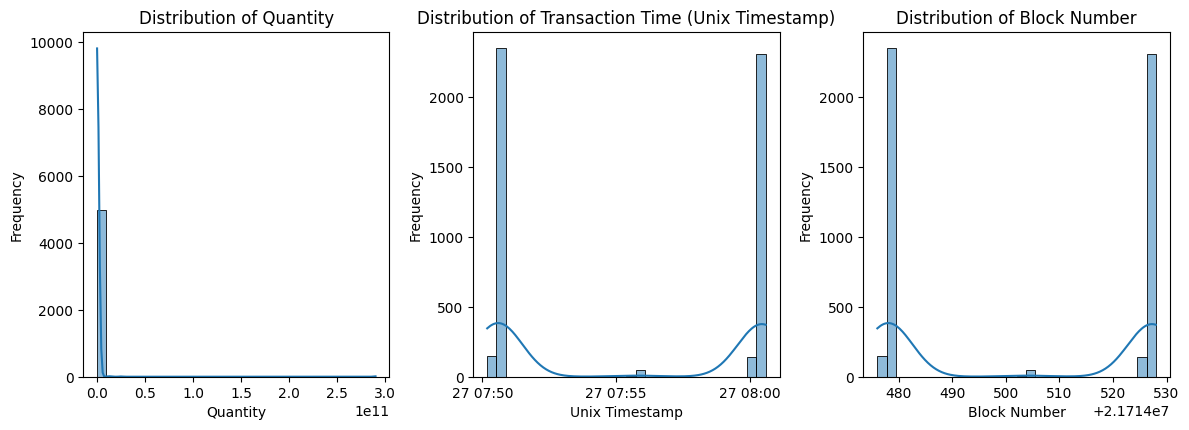

In [25]:
# Histogram

plt.figure(figsize=(12, 8))

# Histogram: Quantity
plt.subplot(2, 3, 1)
sns.histplot(data['Quantity'], kde=True, bins=30)
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')

# Histogram: Transaction Time
plt.subplot(2, 3, 2)
sns.histplot(data['DateTime (UTC)'], kde=True, bins=30)
plt.title('Distribution of Transaction Time (Unix Timestamp)')
plt.xlabel('Unix Timestamp')
plt.ylabel('Frequency')

# Histogram: Block Number
plt.subplot(2, 3, 3)
sns.histplot(data['BlockNo'], kde=True, bins=30)
plt.title('Distribution of Block Number')
plt.xlabel('Block Number')
plt.ylabel('Frequency')

# Adjust the layout
plt.tight_layout()
plt.show()


# **Local Outlier Factor (LOF)**

In [26]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt
import networkx as nx  # Import networkx

# Task 1: Clean and preprocess the dataset
# Scale numerical features and encode categorical variables

def preprocess_data(data):
    # Select numerical features
    numerical_features = ['Quantity','Degree Centrality', 'Betweenness Centrality', 'Closeness Centrality', 'BlockNo', 'Value (USD)']
    scaler = MinMaxScaler()
    data[numerical_features] = scaler.fit_transform(data[numerical_features])

    # Select categorical features
    categorical_features = ['From', 'To', 'Method']
    encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    encoded_categories = encoder.fit_transform(data[categorical_features])
    encoded_df = pd.DataFrame(encoded_categories, columns=encoder.get_feature_names_out(categorical_features))

    # Combine numerical and encoded categorical features
    preprocessed_data = pd.concat([data[numerical_features], encoded_df], axis=1)
    return preprocessed_data

In [27]:
# Task 2: Feature selection and/or creation
def create_features(data):
    # Calculate and add 'Betweenness Centrality' if it's not present
    if not all(col in data.columns for col in ['Degree Centrality', 'Betweenness Centrality', 'Closeness Centrality']):
        # Create a directed graph from the transaction data
        G = nx.DiGraph()
        edges = data[['From', 'To', 'Quantity']].values
        G.add_weighted_edges_from(edges)
        # Compute centrality metrics
        betweenness_centrality = nx.betweenness_centrality(G, weight='weight')
        # Add these features to the original dataset
        data['Betweenness Centrality'] = data['From'].map(betweenness_centrality)
        # Add other centrality metrics if they are not present
        degree_centrality = nx.degree_centrality(G)
        closeness_centrality = nx.closeness_centrality(G)
        data['Degree Centrality'] = data['From'].map(degree_centrality)
        data['Closeness Centrality'] = data['From'].map(closeness_centrality)

    # Calculate TransactionFrequency and TransactionAmountRatio
    data['TransactionFrequency'] = data.groupby('From')['Quantity'].transform('count') # Fixed: Use 'Quantity' for count
    data['TransactionAmountRatio'] = data['Quantity'] / data.groupby('From')['Quantity'].transform('sum')
    return data

# Create features before preprocessing
data_with_features = create_features(data)

# Preprocess the data after feature creation
preprocessed_data = preprocess_data(data_with_features)

In [28]:
from IPython.display import display
# Create features before preprocessing
data_with_features = create_features(data)

# Preprocess the data after feature creation
preprocessed_data = preprocess_data(data_with_features)

# Display the first few rows of the updated data
display(data.head())

,Transaction Hash,Status,Method,BlockNo,DateTime (UTC),From,To,Quantity,Value (USD),Token,Betweenness Centrality,Degree Centrality,Closeness Centrality,TransactionFrequency,TransactionAmountRatio
0,0xba3c40766f6239ebccb0ea7bdcce294c2704f7d25bf0...,Success,0x771d503f,0.0,2025-01-27 07:50:11,0x51c72848c68a965f66fa7a88855f9f7784502a7f,0x11b815efb8f581194ae79006d24e0d814b7697f6,1.499363e-10,0.066748,Wrapped Ether(WETH),0.121723,0.226804,0.829333,92,1.678552e-10
96,0x5f483dd53589d4fb4a7f880419af6be62fc7bde0f384...,Success,Transfer,0.0,2025-01-27 07:50:11,0xaacc7f8128b90e520bffa82800b7f7c1ecb6c275,0x1ab4973a48dc892cd9971ece8e01dcc7688f8f23,2.076764e-09,0.000301,Tether USD(USDT),0.000000,0.000000,0.000000,2,5.000000e-01
97,0xe8e6f5dc10a34649713203547748e0d32134d6fa0909...,Success,Transfer,0.0,2025-01-27 07:50:11,0xcc4d17ae9fd68cdbc6143233cf75670af932944d,0x1ab4973a48dc892cd9971ece8e01dcc7688f8f23,5.413037e-10,0.000078,Tether USD(USDT),0.000000,0.000000,0.000000,2,5.000000e-01
98,0x775ffa594bad49240182f07912f256aff5cb7abfbeb2...,Success,Transfer,0.0,2025-01-27 07:50:11,0xceb69f6342ece283b2f5c9088ff249b5d0ae66ea,0xb2243e7da71a3e22a3e4a777d30190d69f4a2fff,1.064411e-06,0.042424,Ribbon(RBN),0.000000,0.000000,0.000000,2,5.000000e-01
99,0x1e98dd6403e638098345bf7634c2d82da2821f01156b...,Success,Transfer,0.0,2025-01-27 07:50:11,0xdd3d72c53ff982ff59853da71158bf1538b3ceee,0xf0d513f7a77cb189e8807eac3d4c12de171fcada,8.359547e-10,0.000121,Tether USD(USDT)﻿Transaction Hash,0.000000,0.010309,0.000000,11,6.663956e-03


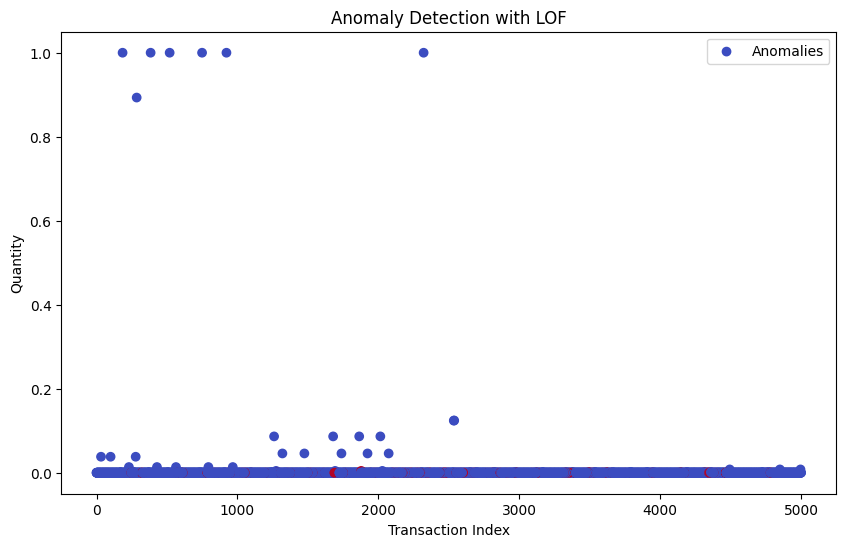

In [29]:
# Task 3: Initialize and train the Local Outlier Factor (LOF) model
import numpy as np
# Select relevant features for LOF
relevant_features = preprocessed_data.columns
X = preprocessed_data[relevant_features]

# Train the LOF model
lof_model = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
preprocessed_data['AnomalyScore'] = lof_model.fit_predict(X)
preprocessed_data['AnomalyScore'] = np.where(preprocessed_data['AnomalyScore'] == -1, 1, 0)  # 1 for anomaly, 0 for normal
import os

# Before saving the file, create the directory if it doesn't exist:
os.makedirs('/content/data', exist_ok=True)

# Save the results to a CSV file
preprocessed_data.to_csv('/content/data/lof_anomaly_detection_results.csv', index=False)

# Visualize anomalies
plt.figure(figsize=(10, 6))
plt.scatter(preprocessed_data.index, preprocessed_data['Quantity'], c=preprocessed_data['AnomalyScore'], cmap='coolwarm', label='Anomalies')
plt.title('Anomaly Detection with LOF')
plt.xlabel('Transaction Index')
plt.ylabel('Quantity')
plt.legend()
plt.savefig('/content/data/lof_anomaly_detection_visualization.png')
plt.show()

In [30]:
# Step 1: Select relevant features
X = data[['Quantity']].copy()

# Step 2: Normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Train the LOF model
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)  # 10% of data as anomalies
y_pred = lof.fit_predict(X_scaled)

# Add the LOF scores and labels to the dataset
data['LOF_Score'] = lof.negative_outlier_factor_
data['Outlier_Label'] = y_pred  # -1 = anomalous, 1 = normal

# Step 4: Display anomalies
anomalies = data[data['Outlier_Label'] == -1]
print(f"Number of anomalies detected: {len(anomalies)}")
anomalies


Number of anomalies detected: 496


,Transaction Hash,Status,Method,BlockNo,DateTime (UTC),From,To,Quantity,Value (USD),Token,Betweenness Centrality,Degree Centrality,Closeness Centrality,TransactionFrequency,TransactionAmountRatio,LOF_Score,Outlier_Label
96,0x5f483dd53589d4fb4a7f880419af6be62fc7bde0f384...,Success,Transfer,0.0,2025-01-27 07:50:11,0xaacc7f8128b90e520bffa82800b7f7c1ecb6c275,0x1ab4973a48dc892cd9971ece8e01dcc7688f8f23,2.076764e-09,0.000301,Tether USD(USDT),0.000000,0.000000,0.000000,2,0.500000,-1.963802,-1
98,0x775ffa594bad49240182f07912f256aff5cb7abfbeb2...,Success,Transfer,0.0,2025-01-27 07:50:11,0xceb69f6342ece283b2f5c9088ff249b5d0ae66ea,0xb2243e7da71a3e22a3e4a777d30190d69f4a2fff,1.064411e-06,0.042424,Ribbon(RBN),0.000000,0.000000,0.000000,2,0.500000,-39.480458,-1
100,0x979c9711ee7f7eafdbf51f6e11844503e34754fb4f83...,Success,Transfer,0.0,2025-01-27 07:50:11,0xac7ec95e99be4bb399f7a6d2f638878a103f52a4,0x5d409f416dd66db647ac8a0cc4e8c9a1109e34a9,3.806316e-02,0.006411,Mog Coin(Mog),0.000000,0.000000,0.000000,2,0.500000,-4.972435,-1
101,0xeedc560251a67518b14c54d57e422c86e1324d4413a2...,Success,Transfer,0.0,2025-01-27 07:50:11,0x0d0707963952f2fba59dd06f2b425ace40b492fe,0xe71cab44917bf40b072b47138a76006558cb29c6,9.954455e-06,0.073701,Aethir Token(ATH),0.000000,0.041237,0.000000,20,0.348009,-1.754182,-1
105,0x6ac96cff515d6de7e67bc907e677860315114c161883...,Success,Transfer,0.0,2025-01-27 07:50:11,0x0d0707963952f2fba59dd06f2b425ace40b492fe,0xf0b09a1df25364a406eb671d31a47e07bd962842,1.647571e-06,0.000000,Network3(N3),0.000000,0.041237,0.000000,20,0.057599,-2.309790,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3843,0x44ac2f2931ecd17e27e5262134b6f14f02617e28f6ee...,Success,0xa0000000,1.0,2025-01-27 08:00:35,0x1ac1a8feaaea1900c4166deeed0c11cc10669d36,0x68d3a973e7272eb388022a5c6518d9b2a2e66fbf,2.536477e-08,0.003676,USDC(USDC),0.000000,0.010309,0.652676,11,0.090909,-2.165273,-1
3804,0x5bbe8253b11f174f15342cb304f7839cce383834a77e...,Success,0x00d29b42,1.0,2025-01-27 08:00:35,0xd29b429ebb38f49f2439c009b5e6feb8c98645a4,0x32d2662effcdac9b6fbd99d1bdb8c235e77c3f3c,5.238835e-07,0.001382,Business Coin(BUSINESS),0.000000,0.010309,0.018778,6,0.166667,-44.088655,-1
3818,0xa789d195e4167ea904d06b7ce3fc5171fd5f83fa187a...,Success,0x2a0aad11,1.0,2025-01-27 08:00:35,0xf359492d26764481002ed88bd2acae83ca50b5c9,0xabd69d0fac4b0851dafe100979df808eb7fb81a9,1.150212e-06,0.000989,Telcoin(TEL),0.000031,0.010309,0.018778,8,0.125000,-17.149226,-1
4057,0xa789d195e4167ea904d06b7ce3fc5171fd5f83fa187a...,Success,0x2a0aad11,1.0,2025-01-27 08:00:35,0xf359492d26764481002ed88bd2acae83ca50b5c9,0xabd69d0fac4b0851dafe100979df808eb7fb81a9,1.150212e-06,0.000989,Telcoin(TEL),0.000031,0.010309,0.018778,8,0.125000,-17.149226,-1


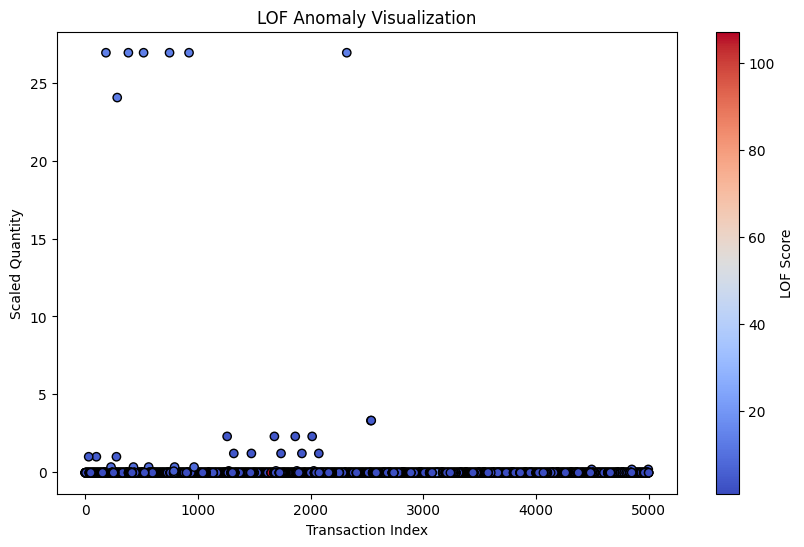

In [31]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler #Import StandardScaler


# Step 1: Select relevant features
X = data[['Quantity']].copy()

# Step 2: Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Train the LOF model
from sklearn.neighbors import LocalOutlierFactor
lof_model = LocalOutlierFactor(n_neighbors=20, contamination=0.05)

# Calculate LOF scores
lof_model.fit(X_scaled)  # Fit the model to your data before getting outlier scores
lof_scores = -lof_model.negative_outlier_factor_  # Get LOF scores


# Now you can plot - Scatter plot of transaction index vs scaled quantity colored by LOF Score
plt.figure(figsize=(10, 6))
plt.scatter(X.index, X_scaled, c=lof_scores, cmap='coolwarm', edgecolor='k')
plt.colorbar(label="LOF Score")
plt.title("LOF Anomaly Visualization")
plt.xlabel("Transaction Index")
plt.ylabel("Scaled Quantity")
plt.show()

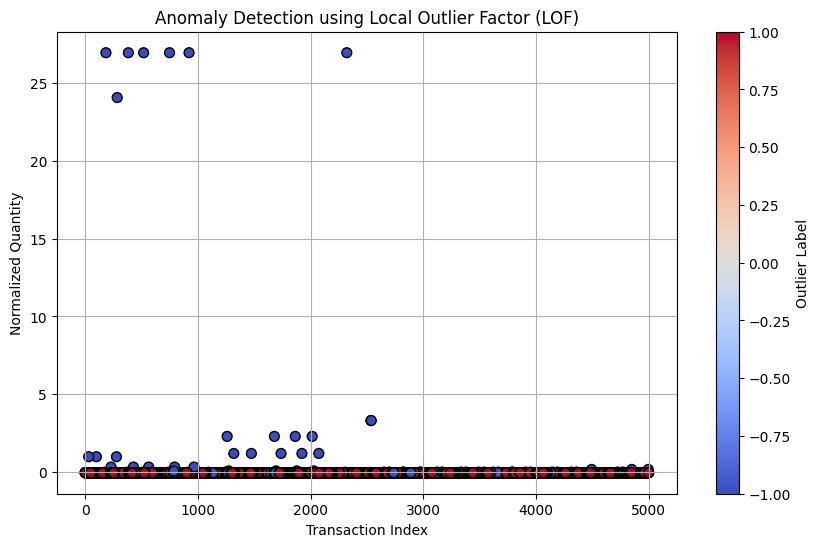

In [32]:
import matplotlib.pyplot as plt

# Prepare the data for visualization
X['Outlier_Label'] = y_pred  # Add labels for normal (1) and anomalous (-1)

# Plot the data points
plt.figure(figsize=(10, 6))
plt.scatter(X.index, X_scaled, c=y_pred, cmap='coolwarm', edgecolor='k', s=50)

# Highlight anomalies
plt.title('Anomaly Detection using Local Outlier Factor (LOF)')
plt.xlabel('Transaction Index')
plt.ylabel('Normalized Quantity')
plt.colorbar(label='Outlier Label')
plt.grid(True)
plt.show()


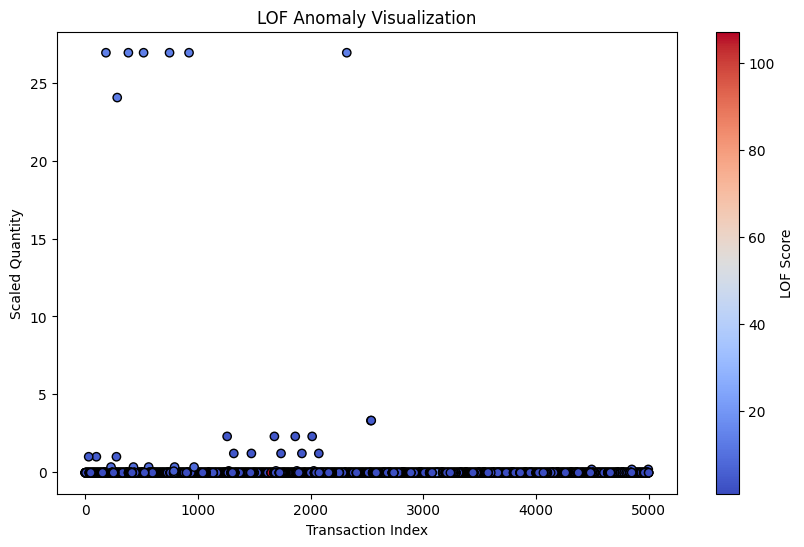

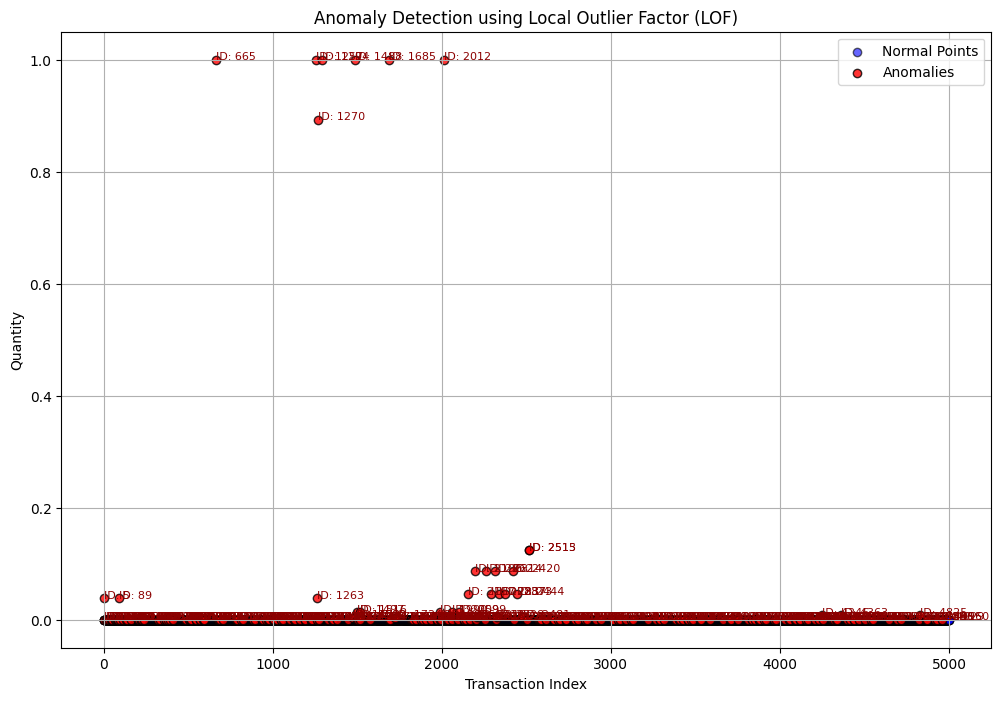

In [33]:
# Step 1: Select relevant features
X = data[['Quantity']].copy()

# Step 2: Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Train the LOF model
from sklearn.neighbors import LocalOutlierFactor
lof_model = LocalOutlierFactor(n_neighbors=20, contamination=0.05)

# Calculate LOF scores
lof_model.fit(X_scaled)  # Fit the model to your data before getting outlier scores
lof_scores = -lof_model.negative_outlier_factor_  # Get LOF scores

# Add LOF labels to the dataset
y_pred = lof_model.fit_predict(X_scaled)
data['Outlier_Label'] = y_pred  # -1 = anomalous, 1 = normal

# Now you can plot - Scatter plot of transaction index vs scaled quantity colored by LOF Score
plt.figure(figsize=(10, 6))
plt.scatter(X.index, X_scaled, c=lof_scores, cmap='coolwarm', edgecolor='k')
plt.colorbar(label="LOF Score")
plt.title("LOF Anomaly Visualization")
plt.xlabel("Transaction Index")
plt.ylabel("Scaled Quantity")
plt.show()


# Prepare the data for visualization
data['Index'] = range(len(data))  # Add an index column for easy referencing
normal_points = data[data['Outlier_Label'] == 1]
anomalies = data[data['Outlier_Label'] == -1]

# Plot normal points
plt.figure(figsize=(12, 8))
plt.scatter(
    normal_points['Index'],
    normal_points['Quantity'],
    c='blue',
    label='Normal Points',
    alpha=0.6,
    edgecolor='k'
)

# Plot anomalous points
plt.scatter(
    anomalies['Index'],
    anomalies['Quantity'],
    c='red',
    label='Anomalies',
    alpha=0.8,
    edgecolor='k'
)

# Annotate anomalies
for _, row in anomalies.iterrows():
    plt.text(
        row['Index'],
        row['Quantity'],
        f"ID: {int(row['Index'])}",
        fontsize=8,
        color='darkred'
    )

# Add plot details
plt.title('Anomaly Detection using Local Outlier Factor (LOF)')
plt.xlabel('Transaction Index')
plt.ylabel('Quantity')
plt.legend()
plt.grid(True)
plt.show()

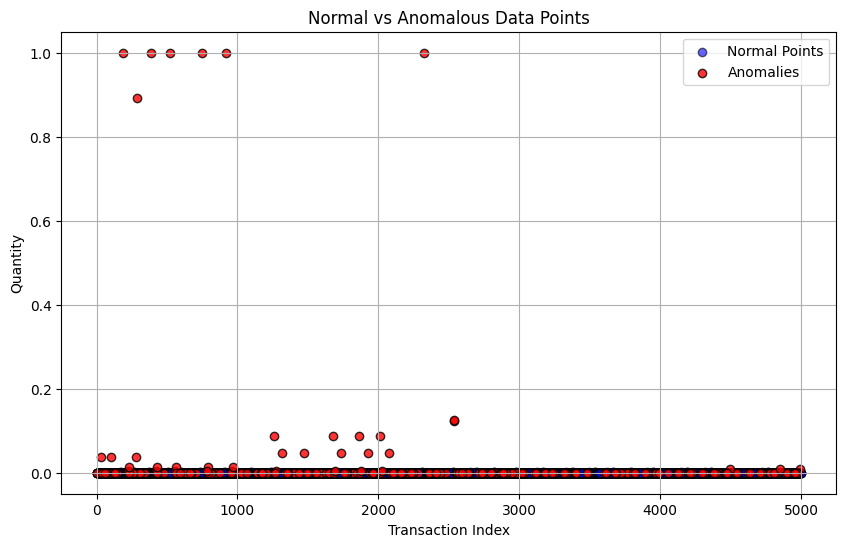

In [34]:
# Split data into normal and anomalous points
normal_points = data[data['Outlier_Label'] == 1]
anomalies = data[data['Outlier_Label'] == -1]

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(normal_points.index, normal_points['Quantity'], c='blue', label='Normal Points', alpha=0.6, edgecolor='k')
plt.scatter(anomalies.index, anomalies['Quantity'], c='red', label='Anomalies', alpha=0.8, edgecolor='k')

# Plot details
plt.title('Normal vs Anomalous Data Points')
plt.xlabel('Transaction Index')
plt.ylabel('Quantity')
plt.legend()
plt.grid(True)
plt.show()

In [35]:
# Count anomalies and normal points
num_anomalies = (data['Outlier_Label'] == -1).sum()
num_normal = (data['Outlier_Label'] == 1).sum()

print(f"Number of anomalies detected: {num_anomalies}")
print(f"Number of normal points: {num_normal}")

# Display top anomalies with the lowest LOF scores
top_anomalies = data[data['Outlier_Label'] == -1].sort_values(by='LOF_Score')
print("Top anomalies based on LOF Score:")
print(top_anomalies[['Quantity', 'LOF_Score']].head())


Number of anomalies detected: 248
Number of normal points: 4752
Top anomalies based on LOF Score:
          Quantity   LOF_Score
1652  3.601487e-08 -107.185441
1650  3.598681e-08 -105.658697
2836  3.503443e-08  -61.013255
2987  3.503443e-08  -61.013255
1663  1.092893e-06  -56.050270


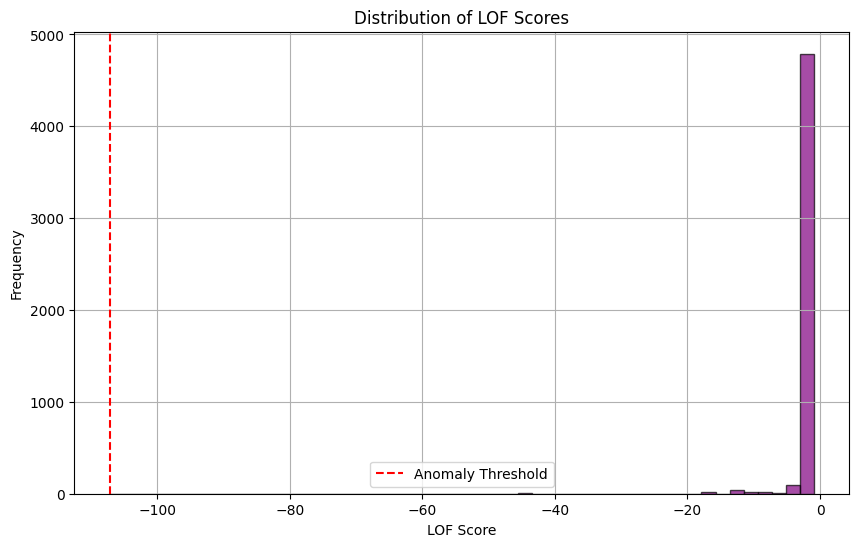

In [36]:
# Histogram of LOF Scores
plt.figure(figsize=(10, 6))
plt.hist(data['LOF_Score'], bins=50, color='purple', alpha=0.7, edgecolor='black')
plt.title('Distribution of LOF Scores')
plt.xlabel('LOF Score')
plt.ylabel('Frequency')
plt.axvline(x=min(data['LOF_Score']), color='red', linestyle='--', label='Anomaly Threshold')
plt.legend()
plt.grid(True)
plt.show()


In [39]:
df=data

#Isolation Forest

In [40]:
# Apply log transformation for Quantity
import numpy as np
data['Quantity_Log'] = np.log1p(data['Quantity'])

# Bin the Quantity column
bins = [0, 100, 500, 1000, 5000, np.inf]
labels = ['0-100', '101-500', '501-1000', '1001-5000', '5000+']
data['Quantity_Binned'] = pd.cut(data['Quantity'], bins=bins, labels=labels)

# Display transformed columns
data[['Quantity', 'Quantity_Log', 'Quantity_Binned']].head()


,Quantity,Quantity_Log,Quantity_Binned
0,1.499363e-10,1.499363e-10,0-100
96,2.076764e-09,2.076764e-09,0-100
97,5.413037e-10,5.413037e-10,0-100
98,1.064411e-06,1.064411e-06,0-100
99,8.359547e-10,8.359547e-10,0-100


In [41]:
# Identify self-trades
data['Is_Self_Trade'] = data['From'] == data['To']

# Count the number of self-trades
num_self_trades = data['Is_Self_Trade'].sum()

# Display self-trade results
print("Number of Self-Trades:", num_self_trades)
print("\nExample Self-Trades:")
data[data['Is_Self_Trade']].head()


Number of Self-Trades: 0

Example Self-Trades:


,Transaction Hash,Status,Method,BlockNo,DateTime (UTC),From,To,Quantity,Value (USD),Token,...,Degree Centrality,Closeness Centrality,TransactionFrequency,TransactionAmountRatio,LOF_Score,Outlier_Label,Index,Quantity_Log,Quantity_Binned,Is_Self_Trade


In [42]:
# Initialize a new column to mark circular trades
data['Is_Circular_Trade'] = False

# Group by 'From' and 'To' pairs
grouped_pairs = data.groupby(['From', 'To'])

# Identify pairs with multiple transactions
for (from_addr, to_addr), group in grouped_pairs:
    if len(group) > 1:  # If more than one transaction exists for the pair
        data.loc[group.index, 'Is_Circular_Trade'] = True

# Count the number of circular trades
num_circular_trades = data['Is_Circular_Trade'].sum()

# Display circular trade results
print("Number of Circular Trades:", num_circular_trades)
print("\nExample Circular Trades:")
data[data['Is_Circular_Trade']].head()

Number of Circular Trades: 4865

Example Circular Trades:


,Transaction Hash,Status,Method,BlockNo,DateTime (UTC),From,To,Quantity,Value (USD),Token,...,Closeness Centrality,TransactionFrequency,TransactionAmountRatio,LOF_Score,Outlier_Label,Index,Quantity_Log,Quantity_Binned,Is_Self_Trade,Is_Circular_Trade
0,0xba3c40766f6239ebccb0ea7bdcce294c2704f7d25bf0...,Success,0x771d503f,0.0,2025-01-27 07:50:11,0x51c72848c68a965f66fa7a88855f9f7784502a7f,0x11b815efb8f581194ae79006d24e0d814b7697f6,1.499363e-10,0.066748,Wrapped Ether(WETH),...,0.829333,92,1.678552e-10,-1.033473,1,0,1.499363e-10,0-100,False,True
96,0x5f483dd53589d4fb4a7f880419af6be62fc7bde0f384...,Success,Transfer,0.0,2025-01-27 07:50:11,0xaacc7f8128b90e520bffa82800b7f7c1ecb6c275,0x1ab4973a48dc892cd9971ece8e01dcc7688f8f23,2.076764e-09,0.000301,Tether USD(USDT),...,0.000000,2,5.000000e-01,-1.963802,1,1,2.076764e-09,0-100,False,True
97,0xe8e6f5dc10a34649713203547748e0d32134d6fa0909...,Success,Transfer,0.0,2025-01-27 07:50:11,0xcc4d17ae9fd68cdbc6143233cf75670af932944d,0x1ab4973a48dc892cd9971ece8e01dcc7688f8f23,5.413037e-10,0.000078,Tether USD(USDT),...,0.000000,2,5.000000e-01,-1.093596,1,2,5.413037e-10,0-100,False,True
98,0x775ffa594bad49240182f07912f256aff5cb7abfbeb2...,Success,Transfer,0.0,2025-01-27 07:50:11,0xceb69f6342ece283b2f5c9088ff249b5d0ae66ea,0xb2243e7da71a3e22a3e4a777d30190d69f4a2fff,1.064411e-06,0.042424,Ribbon(RBN),...,0.000000,2,5.000000e-01,-39.480458,-1,3,1.064411e-06,0-100,False,True
99,0x1e98dd6403e638098345bf7634c2d82da2821f01156b...,Success,Transfer,0.0,2025-01-27 07:50:11,0xdd3d72c53ff982ff59853da71158bf1538b3ceee,0xf0d513f7a77cb189e8807eac3d4c12de171fcada,8.359547e-10,0.000121,Tether USD(USDT)﻿Transaction Hash,...,0.000000,11,6.663956e-03,-1.002991,1,4,8.359547e-10,0-100,False,True


In [43]:
data['Time_Diff'] = data['DateTime (UTC)'].diff().dt.total_seconds().fillna(0)

In [44]:
# Ensure the DataFrame is sorted by 'DateTime (UTC)' for proper rolling calculations
data = data.sort_values(by='DateTime (UTC)')

# Define the rolling window size (e.g., 5 transactions)
window_size = 5

# Calculate rolling mean and standard deviation for 'Quantity'
data['Rolling_Mean_Quantity'] = data['Quantity'].rolling(window=window_size).mean()
data['Rolling_Std_Quantity'] = data['Quantity'].rolling(window=window_size).std()

# Display the rolling statistics
print("Rolling Statistics (Mean and Std):")
data[['Quantity', 'Rolling_Mean_Quantity', 'Rolling_Std_Quantity']].head(window_size + 5)


Rolling Statistics (Mean and Std):


,Quantity,Rolling_Mean_Quantity,Rolling_Std_Quantity
0,1.499363e-10,NaN,NaN
1,4.612912e-07,NaN,NaN
74,6.761197e-13,NaN,NaN
16,7.947589e-08,NaN,NaN
18,5.416145e-10,1.082919e-07,2.002940e-07
35,2.827791e-08,1.139175e-07,1.968629e-07
19,1.034932e-08,2.372908e-08,3.319681e-08
34,4.379557e-09,2.460486e-08,3.246400e-08
33,9.954455e-06,1.999601e-06,4.446912e-06
32,3.806316e-02,7.614632e-03,1.702125e-02


In [45]:
# Calculate the IQR for Quantity
Q1 = data['Quantity'].quantile(0.25)  # First quartile (25th percentile)
Q3 = data['Quantity'].quantile(0.75)  # Third quartile (75th percentile)
IQR = Q3 - Q1  # Interquartile range

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
data['Is_Outlier'] = (data['Quantity'] < lower_bound) | (data['Quantity'] > upper_bound)

# Cap outliers at the bounds
data['Quantity_Capped'] = data['Quantity'].clip(lower=lower_bound, upper=upper_bound)

# Display the results
print("Outlier Detection and Capping:")
print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
print(f"Number of Outliers Detected: {data['Is_Outlier'].sum()}")
print("\nSample Data with Capped Quantity:")
data[['Quantity', 'Is_Outlier', 'Quantity_Capped']].head(10)

Outlier Detection and Capping:
Lower Bound: -1.291810264464438e-07, Upper Bound: 2.1549957767708647e-07
Number of Outliers Detected: 974

Sample Data with Capped Quantity:


,Quantity,Is_Outlier,Quantity_Capped
0,1.499363e-10,False,1.499363e-10
1,4.612912e-07,True,2.154996e-07
74,6.761197e-13,False,6.761197e-13
16,7.947589e-08,False,7.947589e-08
18,5.416145e-10,False,5.416145e-10
35,2.827791e-08,False,2.827791e-08
19,1.034932e-08,False,1.034932e-08
34,4.379557e-09,False,4.379557e-09
33,9.954455e-06,True,2.154996e-07
32,3.806316e-02,True,2.154996e-07


In [46]:
# Unusual Trades Based on Frequency (Very High Activity)
transaction_counts = data.groupby('From').size().reset_index(name='Transaction_Count')
high_activity_threshold = transaction_counts['Transaction_Count'].quantile(0.95)  # Top 5% active addresses
high_activity_addresses = transaction_counts[transaction_counts['Transaction_Count'] > high_activity_threshold]['From']

# Create the 'Is_High_Activity' column
data['Is_High_Activity'] = data['From'].isin(high_activity_addresses) # Check if 'From' address is in high_activity_addresses

print("\nUnusual Trades Based on High Activity:")
data[data['Is_High_Activity']].head()


Unusual Trades Based on High Activity:


,Transaction Hash,Status,Method,BlockNo,DateTime (UTC),From,To,Quantity,Value (USD),Token,...,Quantity_Log,Quantity_Binned,Is_Self_Trade,Is_Circular_Trade,Time_Diff,Rolling_Mean_Quantity,Rolling_Std_Quantity,Is_Outlier,Quantity_Capped,Is_High_Activity
0,0xba3c40766f6239ebccb0ea7bdcce294c2704f7d25bf0...,Success,0x771d503f,0.0,2025-01-27 07:50:11,0x51c72848c68a965f66fa7a88855f9f7784502a7f,0x11b815efb8f581194ae79006d24e0d814b7697f6,1.499363e-10,0.066748,Wrapped Ether(WETH),...,1.499363e-10,0-100,False,True,0.0,NaN,NaN,False,1.499363e-10,True
1,0xba3c40766f6239ebccb0ea7bdcce294c2704f7d25bf0...,Success,0x771d503f,0.0,2025-01-27 07:50:11,0x11b815efb8f581194ae79006d24e0d814b7697f6,0x51c72848c68a965f66fa7a88855f9f7784502a7f,4.612912e-07,0.066801,Tether USD(USDT),...,4.612911e-07,0-100,False,True,0.0,NaN,NaN,True,2.154996e-07,True
73,0x8daeb683103769d86cbab2a7b54c5037e788ac0cc88a...,Success,0x2213bc0b,0.0,2025-01-27 07:50:11,0x70bf6634ee8cb27d04478f184b9b8bb13e5f4710,0xff8ba4d1fc3762f6154cc942ccf30049a2a0cec6,6.761197e-13,0.000022,Wrapped SOL (Wormhole)(SOL),...,6.761197e-13,0-100,False,True,0.0,6.919313e-06,1.522424e-05,False,6.761197e-13,True
2,0xf5c1b9f4905716ae445ad5e8e51603bb328c5b41b993...,Success,0x771d503f,0.0,2025-01-27 07:50:11,0x51c72848c68a965f66fa7a88855f9f7784502a7f,0x88e6a0c2ddd26feeb64f039a2c41296fcb3f5640,1.966014e-10,0.087522,Wrapped Ether(WETH),...,1.966014e-10,0-100,False,True,0.0,1.656920e-07,3.594456e-07,False,1.966014e-10,True
3,0xf5c1b9f4905716ae445ad5e8e51603bb328c5b41b993...,Success,0x771d503f,0.0,2025-01-27 07:50:11,0x88e6a0c2ddd26feeb64f039a2c41296fcb3f5640,0x51c72848c68a965f66fa7a88855f9f7784502a7f,6.045479e-07,0.087604,USDC(USDC),...,6.045478e-07,0-100,False,True,0.0,2.831518e-07,3.931856e-07,True,2.154996e-07,True


Number of Nodes: 875
Number of Edges: 838


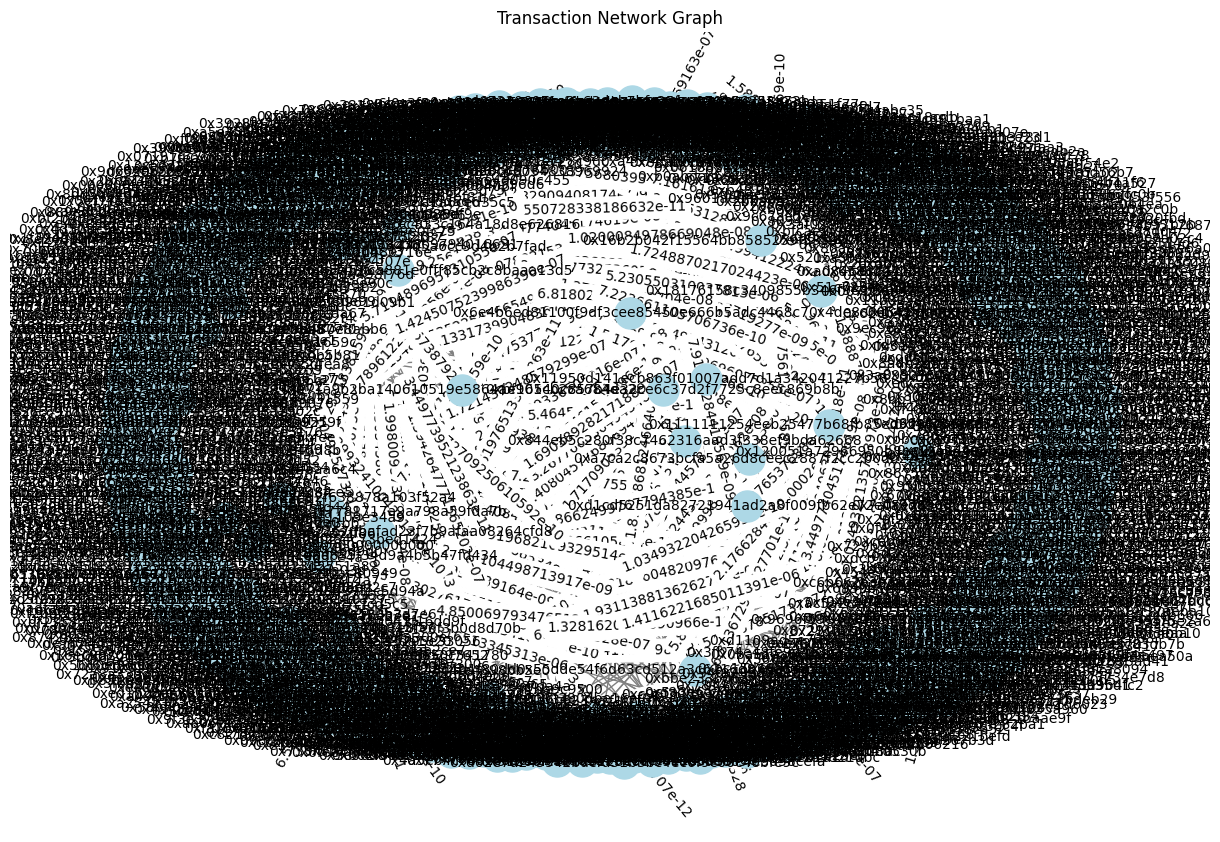

In [49]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# Create a directed graph
G = nx.DiGraph()

# Ensure 'Quantity' column is numeric (in case of any non-numeric data)
data['Quantity'] = pd.to_numeric(data['Quantity'], errors='coerce')

# Add edges to the graph using 'From' and 'To' as nodes and 'Quantity' as the edge weight
for _, row in data.iterrows():
    G.add_edge(row['From'], row['To'], weight=row['Quantity'])

# Display basic graph information
print(f"Number of Nodes: {G.number_of_nodes()}")
print(f"Number of Edges: {G.number_of_edges()}")

# Visualize the graph (simple visualization for small graphs)
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)  # Layout for node positioning
nx.draw(
    G,
    pos,
    with_labels=True,
    node_size=500,
    node_color="lightblue",
    font_size=10,
    edge_color="gray"
)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("Transaction Network Graph")
plt.show()


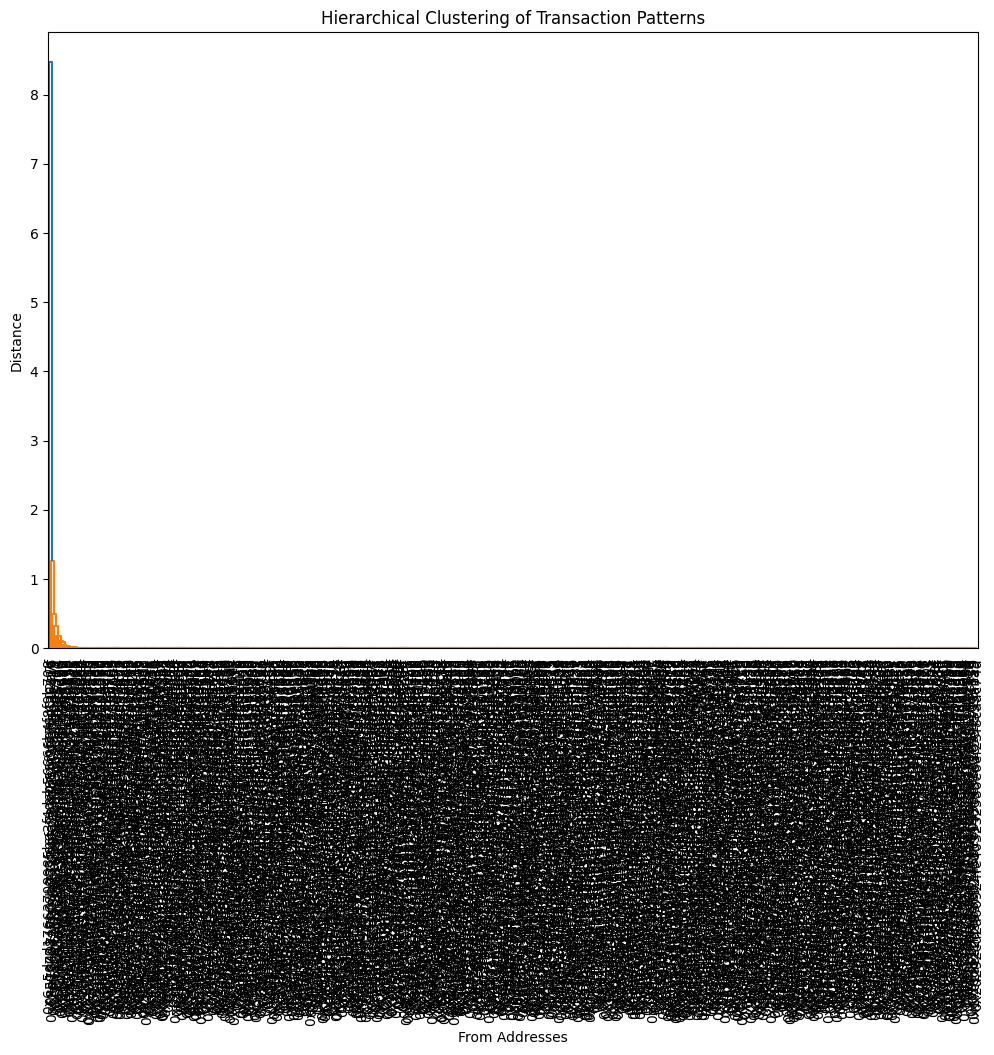

In [50]:
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt

# Create a feature matrix based on transaction patterns
# Aggregating 'Quantity' by 'From' and 'To' addresses
feature_matrix = data.groupby(['From', 'To'])['Quantity'].sum().unstack(fill_value=0)

# Calculate the linkage matrix
# Using Ward's method to minimize variance within clusters
linkage_matrix = linkage(pdist(feature_matrix), method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(
    linkage_matrix,
    labels=feature_matrix.index,
    leaf_rotation=90,
    leaf_font_size=10
)
plt.title("Hierarchical Clustering of Transaction Patterns")
plt.xlabel("From Addresses")
plt.ylabel("Distance")
plt.show()

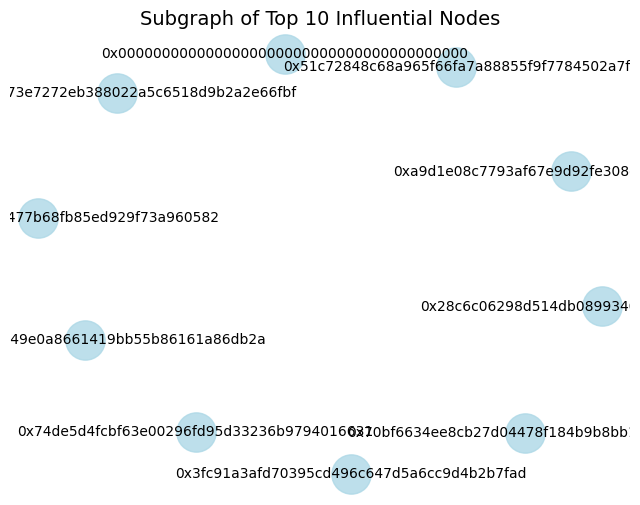

In [52]:
# Calculate degree centrality for each node
centrality = nx.degree_centrality(G)

# Create a DataFrame to store node centrality
centrality_df = pd.DataFrame(centrality.items(), columns=['Node', 'Centrality'])

# Sort the DataFrame by centrality in descending order
centrality_df = centrality_df.sort_values(by='Centrality', ascending=False)

# Extract subgraph for top 10 nodes by degree
top_nodes = centrality_df['Node'].head(10).tolist()
subgraph = G.subgraph(top_nodes)

# Visualize the subgraph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(subgraph, k=0.3)  # Layout for better spacing
nx.draw_networkx_nodes(subgraph, pos, node_size=800, node_color='lightblue', alpha=0.8)
nx.draw_networkx_edges(subgraph, pos, width=2, edge_color='gray', alpha=0.7)
nx.draw_networkx_labels(subgraph, pos, font_size=10, font_color='black')
plt.title("Subgraph of Top 10 Influential Nodes", fontsize=14)
plt.axis("off")
plt.show()

In [53]:
# Calculate centrality metrics using NetworkX
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)

# Convert centrality metrics into DataFrame
centrality_df = pd.DataFrame({
    'Node': list(degree_centrality.keys()),
    'Degree_Centrality': list(degree_centrality.values()),
    'Betweenness_Centrality': list(betweenness_centrality.values()),
    'Closeness_Centrality': list(closeness_centrality.values())
})

# Merge centrality metrics with the original data
data = pd.merge(data, centrality_df, left_on='From', right_on='Node', how='left')

In [54]:
data.columns

Index(['Transaction Hash', 'Status', 'Method', 'BlockNo', 'DateTime (UTC)',
       'From', 'To', 'Quantity', 'Value (USD)', 'Token',
       'Betweenness Centrality', 'Degree Centrality', 'Closeness Centrality',
       'TransactionFrequency', 'TransactionAmountRatio', 'LOF_Score',
       'Outlier_Label', 'Index', 'Quantity_Log', 'Quantity_Binned',
       'Is_Self_Trade', 'Is_Circular_Trade', 'Time_Diff',
       'Rolling_Mean_Quantity', 'Rolling_Std_Quantity', 'Is_Outlier',
       'Quantity_Capped', 'Is_High_Activity', 'Node', 'Degree_Centrality',
       'Betweenness_Centrality', 'Closeness_Centrality'],
      dtype='object')

In [55]:
data.to_csv('features_data.csv', index=False)

In [56]:
data_iof=data.copy()

In [58]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # Import train_test_split

In [59]:
features_to_use = [
    'Quantity',
    'Quantity_Log',
    'Time_Diff',
    'Rolling_Mean_Quantity',
    'Rolling_Std_Quantity',
    'Is_Self_Trade',
    'Is_Circular_Trade',
    'Is_High_Activity',
    'Quantity_Capped',
    'Degree_Centrality',
    'Betweenness_Centrality',
    'Closeness_Centrality'
]

X = data_iof[features_to_use]

# Handle missing values by filling them with the column's median
X = X.fillna(X.median())

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data (80% training, 20% testing)
X_train, X_test = train_test_split(X_scaled , test_size=0.2, random_state=42)

rng = np.random.RandomState(42)

# Initialize the Isolation Forest model with the provided parameters
model_if = IsolationForest(n_estimators=100,contamination=0.02,random_state=rng)

model_if.fit(X_train)

# Predict anomalies (1 for normal, -1 for anomaly)
anomaly_predictions = model_if.predict(X_scaled )

# Add anomaly predictions to the original data
data_iof['Anomaly'] = anomaly_predictions

# Get the anomaly scores (the lower the score, the more abnormal)
anomaly_scores = model_if.decision_function(X_scaled )

# Add the anomaly scores to the data
data_iof['Anomaly_Score'] = anomaly_scores

# View the data with anomaly scores
print(data_iof[['Quantity', 'Rolling_Std_Quantity', 'Anomaly', 'Anomaly_Score']].head())

       Quantity  Rolling_Std_Quantity  Anomaly  Anomaly_Score
0  1.499363e-10                   NaN        1       0.220117
1  4.612912e-07                   NaN        1       0.162301
2  6.761197e-13                   NaN        1       0.289432
3  7.947589e-08                   NaN        1       0.261375
4  5.416145e-10          2.002940e-07        1       0.289200


In [60]:
# Print anomaly statistics
print(data_iof['Anomaly'].value_counts())

Anomaly
 1    4898
-1     102
Name: count, dtype: int64


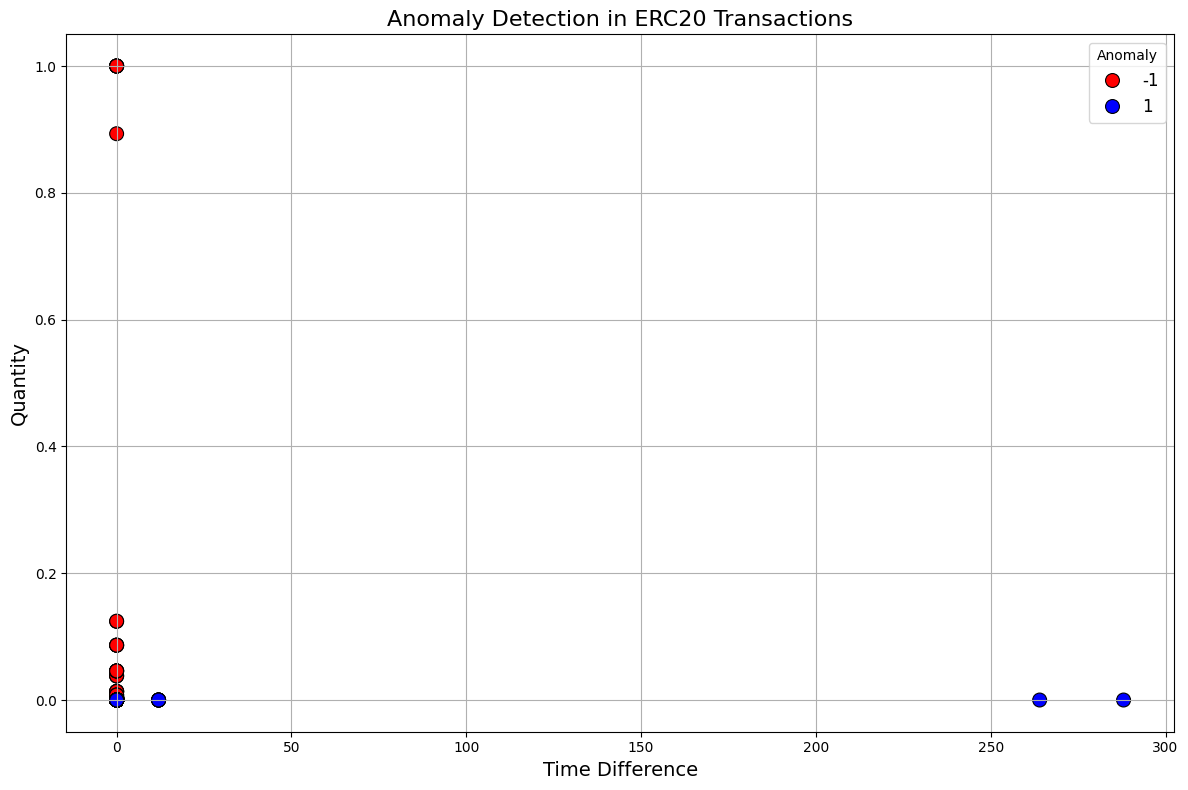

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize anomalies clearly using 'Time_Diff' and 'Quantity' columns
plt.figure(figsize=(12, 8))

sns.scatterplot(data=data_iof, x='Time_Diff', y='Quantity', hue='Anomaly', palette={1: 'blue', -1: 'red'}, s=100, edgecolor='k')

# Set title and labels
plt.title('Anomaly Detection in ERC20 Transactions', fontsize=16)
plt.xlabel('Time Difference', fontsize=14)
plt.ylabel('Quantity', fontsize=14)

# Add a legend to distinguish anomalies
plt.legend(title='Anomaly', loc='upper right', fontsize=12)

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

def outlier_plot(data_iof, outlier_method_name, x_var, y_var,
                 xaxis_limits=None, yaxis_limits=None):
    print(f'Outlier Method: {outlier_method_name}')


    if 'Anomaly' not in data_iof.columns:
        raise ValueError("The 'Anomaly' column is not present in the dataset.")

    # Print anomaly counts
    print(f"Number of anomalous values: {len(data_iof[data_iof['Anomaly'] == -1])}")
    print(f"Number of non-anomalous values: {len(data_iof[data_iof['Anomaly'] == 1])}")
    print(f'Total Number of Values: {len(data_iof)}')

    # Create the FacetGrid plot
    try:
        g = sns.FacetGrid(data_iof, col='Anomaly', height=4, hue='Anomaly', hue_order=[-1, 1])
        g.map(sns.scatterplot, x_var, y_var, alpha=0.7, s=50)
        g.fig.suptitle(f'Outlier Method: {outlier_method_name}', y=1.05, fontweight='bold')

        # Set axis limits if specified
        if xaxis_limits:
            g.set(xlim=xaxis_limits)
        if yaxis_limits:
            g.set(ylim=yaxis_limits)

        # Customize subplot titles
        axes = g.axes.flatten()
        if len(axes) > 0:
            axes[0].set_title(f"Outliers\n{len(data_iof[data_iof['Anomaly'] == -1])} points")
        if len(axes) > 1:
            axes[1].set_title(f"Inliers\n{len(data_iof[data_iof['Anomaly'] == 1])} points")
    except IndexError:
        print("Error: Expected categories in 'Anomaly' column are missing or incorrect.")
        return None

    return g


Outlier Method: Isolation Forest
Number of anomalous values: 102
Number of non-anomalous values: 4898
Total Number of Values: 5000


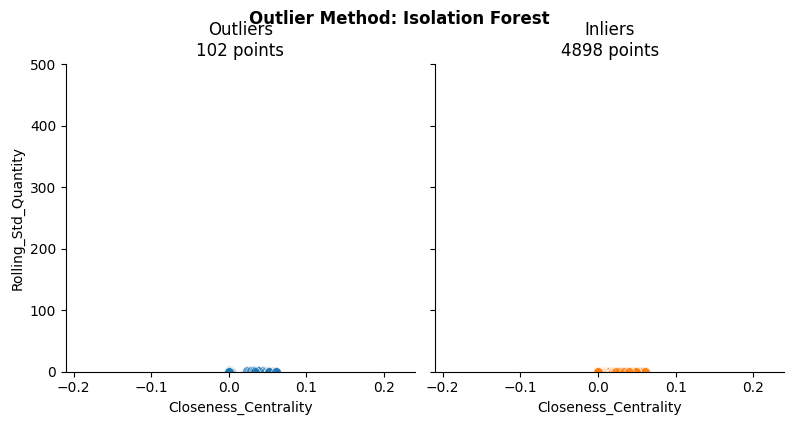

In [64]:
outlier_plot(data_iof, 'Isolation Forest', 'Closeness_Centrality', 'Rolling_Std_Quantity',
             xaxis_limits=[-0.21,0.24], yaxis_limits=[0,500])

<ipython-input-65-e113e284b24d>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


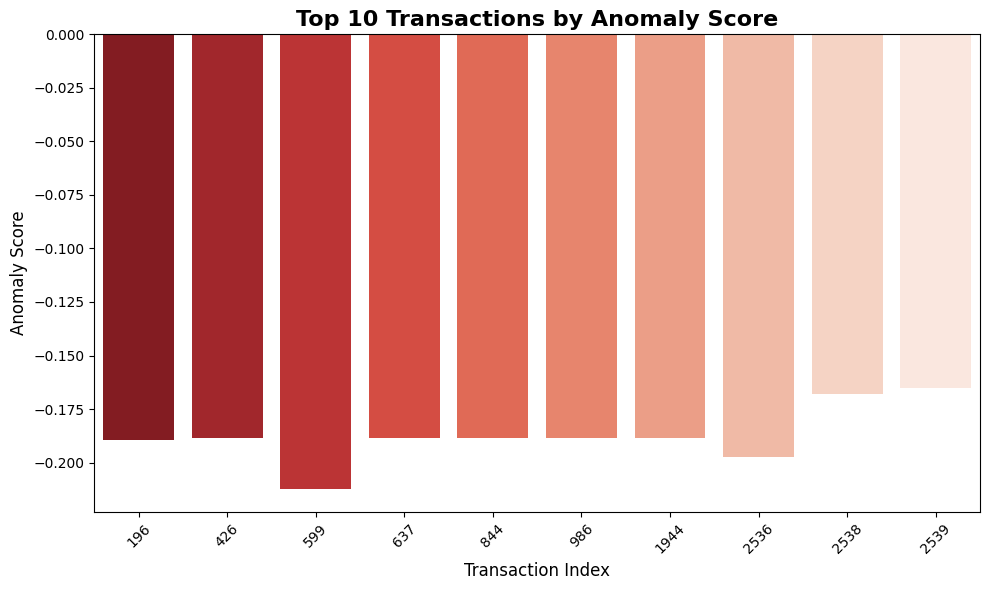

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_top_anomalies(data_iof, score_column, top_n=10):
    # Sort the data by anomaly score in ascending order (more anomalous first)
    top_anomalies = data_iof.nsmallest(top_n, score_column)

    # Create the bar plot
    plt.figure(figsize=(10, 6))
    sns.barplot(
        data=top_anomalies,
        x=top_anomalies.index,
        y=score_column,
        palette="Reds_r"
    )
    plt.title(f'Top {top_n} Transactions by Anomaly Score', fontsize=16, fontweight='bold')
    plt.xlabel('Transaction Index', fontsize=12)
    plt.ylabel('Anomaly Score', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Usage example
visualize_top_anomalies(data_iof, 'Anomaly_Score', top_n=10)


feature imporatance

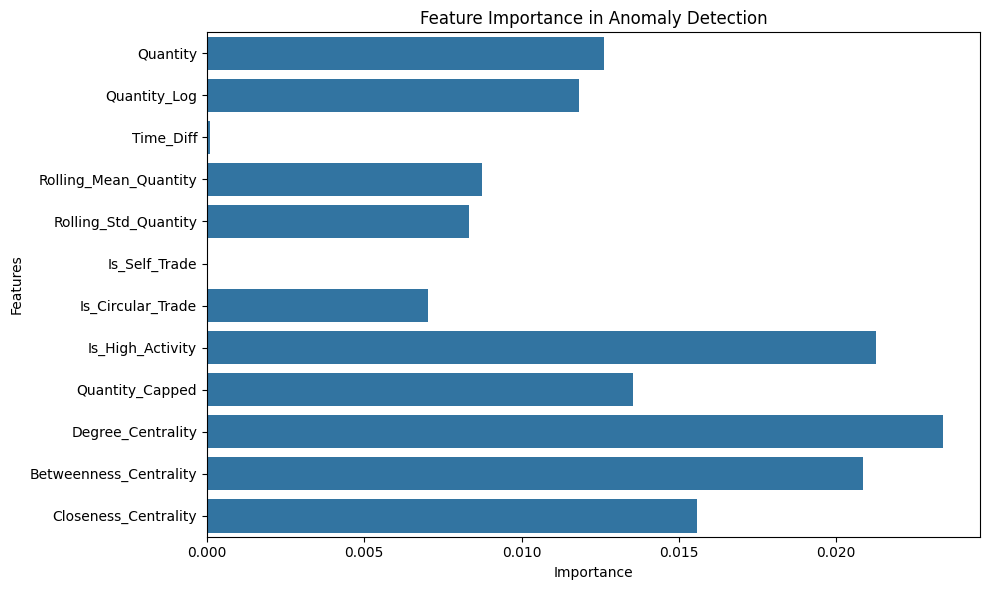

In [66]:
import numpy as np
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import seaborn as sns

# Define a function to compute permutation feature importance manually
def compute_permutation_importance(model, X, feature_indices, n_repeats=10):
    baseline_scores = model.decision_function(X)
    feature_importances = np.zeros(len(feature_indices))

    for i, feature_idx in enumerate(feature_indices):
        scores = []
        for _ in range(n_repeats):
            X_permuted = X.copy()
            X_permuted[:, feature_idx] = shuffle(X[:, feature_idx], random_state=42)
            permuted_scores = model.decision_function(X_permuted)
            scores.append(np.mean(np.abs(baseline_scores - permuted_scores)))
        feature_importances[i] = np.mean(scores)

    return feature_importances


feature_indices = list(range(X_scaled.shape[1])) # Get indices for all features

# Compute feature importance
feature_importance = compute_permutation_importance(
    model_if, X_scaled[:, feature_indices], feature_indices
)

features = [features_to_use[i] for i in feature_indices]

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=features, orient="h")
plt.title('Feature Importance in Anomaly Detection')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


##hyper parameter tuning for Isolation Forest Model


In [67]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import IsolationForest
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Define the parameter grid for Isolation Forest
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_samples': ['auto', 0.5, 0.7, 0.8],
    'contamination': [0.01, 0.05, 0.1, 0.15],
    'max_features': [1.0, 0.5, 0.8],
    'random_state': [42]
}

# Select the relevant features
X = data_iof[[
    'Quantity', 'Quantity_Log', 'Time_Diff', 'Rolling_Mean_Quantity',
    'Rolling_Std_Quantity', 'Is_Self_Trade','Is_Circular_Trade',
    'Is_High_Activity', 'Quantity_Capped','Degree_Centrality',
    'Betweenness_Centrality', 'Closeness_Centrality'
]]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create the Isolation Forest model
iso_forest = IsolationForest()

# Instantiate RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=iso_forest,
    param_distributions=param_dist,
    n_iter=10,
    cv=5,  # Number of cross-validation folds
    scoring='neg_mean_squared_error', # Scoring metric for model evaluation
    random_state=42,
    n_jobs=-1 # Use all available CPU cores for parallel processing
)

# Fit the model with the parameter grid
random_search.fit(X_scaled)

# Get the best parameters and best score
print("Best parameters found: ", random_search.best_params_)

# Access the best model from the random search
best_iso_forest = random_search.best_estimator_

# Predict anomalies (1 for inliers, -1 for anomalies)
anomaly_predictions = best_iso_forest.predict(X_scaled)

# Convert anomaly predictions to binary (1 for inliers, -1 for outliers)
data_iof.loc[:, 'Anomaly'] = np.where(anomaly_predictions == 1, 1, -1)

# Get the anomaly scores
data_iof.loc[:, 'Anomaly_Score'] = best_iso_forest.decision_function(X_scaled)

# View the data with anomaly scores
print(data_iof[['Quantity', 'Time_Diff', 'Anomaly', 'Anomaly_Score']].head())


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Best parameters found:  {'random_state': 42, 'n_estimators': 100, 'max_samples': 0.8, 'max_features': 0.8, 'contamination': 0.01}
       Quantity  Time_Diff  Anomaly  Anomaly_Score
0  1.499363e-10        0.0        1       0.123548
1  4.612912e-07        0.0        1       0.092820
2  6.761197e-13        0.0        1       0.165154
3  7.947589e-08        0.0        1       0.148797
4  5.416145e-10        0.0        1       0.166467


In [68]:
data_iof.columns

Index(['Transaction Hash', 'Status', 'Method', 'BlockNo', 'DateTime (UTC)',
       'From', 'To', 'Quantity', 'Value (USD)', 'Token',
       'Betweenness Centrality', 'Degree Centrality', 'Closeness Centrality',
       'TransactionFrequency', 'TransactionAmountRatio', 'LOF_Score',
       'Outlier_Label', 'Index', 'Quantity_Log', 'Quantity_Binned',
       'Is_Self_Trade', 'Is_Circular_Trade', 'Time_Diff',
       'Rolling_Mean_Quantity', 'Rolling_Std_Quantity', 'Is_Outlier',
       'Quantity_Capped', 'Is_High_Activity', 'Node', 'Degree_Centrality',
       'Betweenness_Centrality', 'Closeness_Centrality', 'Anomaly',
       'Anomaly_Score'],
      dtype='object')

In [69]:
# Print anomaly statistics
print(data_iof['Anomaly'].value_counts())

Anomaly
 1    4950
-1      50
Name: count, dtype: int64


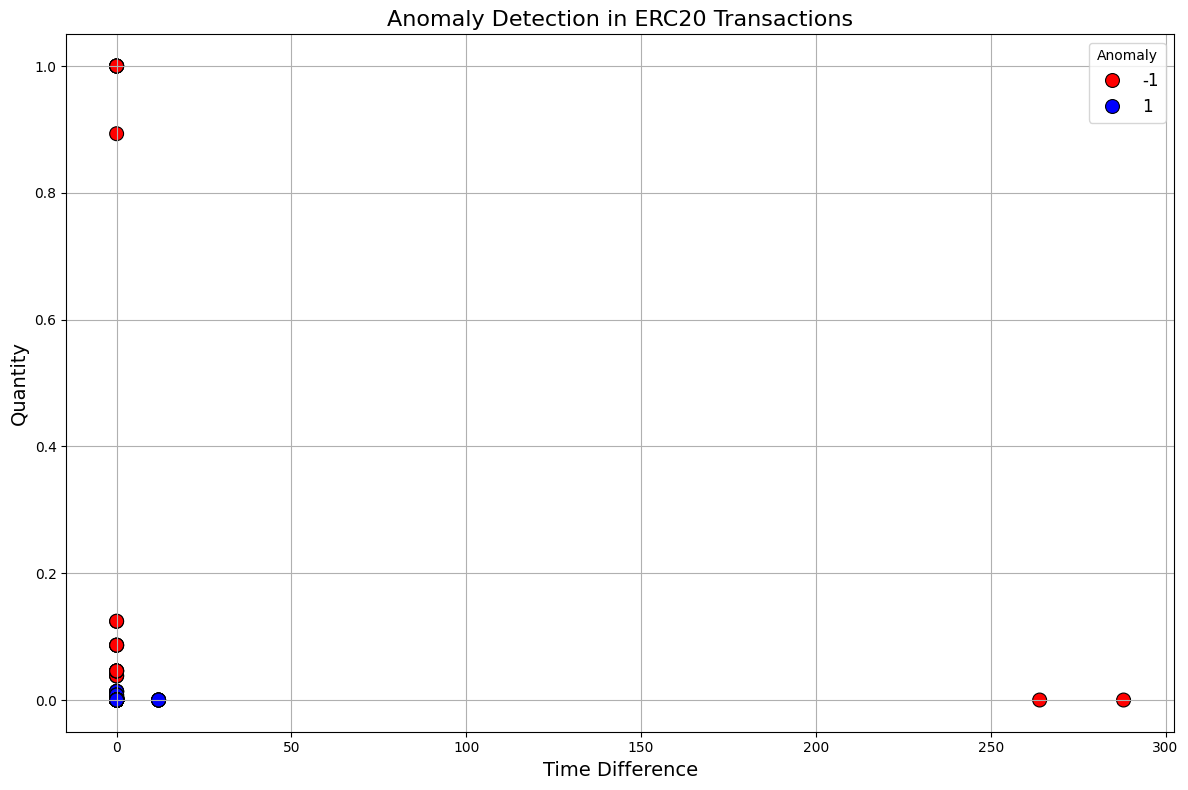

In [74]:
# Visualize anomalies
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=data_iof,
    x='Time_Diff',
    y='Quantity',
    hue='Anomaly',
    palette={-1: 'red', 1: 'blue'},
    s=100,
    edgecolor='k'
)
plt.title('Anomaly Detection in ERC20 Transactions', fontsize=16)
plt.xlabel('Time Difference', fontsize=14)
plt.ylabel('Quantity', fontsize=14)
plt.legend(title='Anomaly', loc='upper right', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

In [75]:
# Get the best parameters and best score
print("Best parameters found: ", random_search.best_params_)

Best parameters found:  {'random_state': 42, 'n_estimators': 100, 'max_samples': 0.8, 'max_features': 0.8, 'contamination': 0.01}


#generated isolation_forest_train_predictions.csv for ensembling


In [76]:
# Select the relevant columns for ensembling
isolation_forest_predictions = data_iof[['Anomaly', 'Anomaly_Score']].copy()

# Safely add the 'Input Data' column using .loc
isolation_forest_predictions.loc[:, 'Input Data'] = data_iof.index

isolation_forest_predictions = isolation_forest_predictions[['Input Data', 'Anomaly', 'Anomaly_Score']]

# Save the updated data (with predictions) to a CSV file
isolation_forest_predictions.to_csv('isolation_forest_predictions.csv', index=False)

# Confirm that the file is saved
print("Isolation forest predictions with input data index saved to 'isolation_forest_predictions.csv'")


Isolation forest predictions with input data index saved to 'isolation_forest_predictions.csv'


In [77]:
data_iof.to_csv('final_data.csv', index=False)

#Testing for Isolation Forest


In [78]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
import joblib

# Train your model on the scaled data
model = best_iso_forest
model.fit(X_scaled)

# Save the model and scaler
joblib.dump(model, 'iso_forest_model.pkl')
joblib.dump(scaler, 'scaler.pkl')  # Save the scaler for later use


['scaler.pkl']

In [79]:
import pandas as pd

# Load the Excel file and get the sheet names
excel_file = '/content/NEAR_token_transaction_data.xlsx'
xls = pd.ExcelFile(excel_file)

# Print sheet names
print(xls.sheet_names)


['export-token-0x85f17cf997934a59']


In [80]:
import pandas as pd
import numpy as np
import networkx as nx
from sklearn.preprocessing import StandardScaler
import joblib

# Function to compute features based on user input
def extract_features(new_data, graph):
    new_data['Quantity_Log'] = np.log(new_data['Quantity'] + 1)


    new_data['UnixTimestamp'] = pd.to_datetime(new_data['UnixTimestamp'], unit='s')

    # Calculate time difference (in seconds)
    new_data['Time_Diff'] = new_data['UnixTimestamp'].diff().fillna(pd.Timedelta(0)).dt.total_seconds()

    # Rolling statistics
    new_data['Rolling_Mean_Quantity'] = new_data['Quantity'].rolling(window=5, min_periods=1).mean()
    new_data['Rolling_Std_Quantity'] = new_data['Quantity'].rolling(window=5, min_periods=1).std()

    # Identifying anomalies
    new_data['Is_Self_Trade'] = (new_data['From'] == new_data['To']).astype(int)
    new_data['Is_Circular_Trade'] = (new_data['From'].duplicated() & new_data['To'].duplicated()).astype(int)
    new_data['Is_High_Activity'] = (new_data['Quantity'] > new_data['Quantity'].quantile(0.75)).astype(int)
    new_data['Quantity_Capped'] = new_data['Quantity'].clip(upper=new_data['Quantity'].quantile(0.95))

    # Add centrality metrics
    degree_centrality = nx.degree_centrality(graph)
    betweenness_centrality = nx.betweenness_centrality(graph)
    closeness_centrality = nx.closeness_centrality(graph)

    # Map centrality metrics to the new data
    new_data['Degree_Centrality'] = new_data['From'].map(degree_centrality).fillna(0)
    new_data['Betweenness_Centrality'] = new_data['From'].map(betweenness_centrality).fillna(0)
    new_data['Closeness_Centrality'] = new_data['From'].map(closeness_centrality).fillna(0)

    return new_data

# Load the pre-trained model and scaler
model = joblib.load('iso_forest_model.pkl')
scaler = joblib.load('scaler.pkl')

# Rebuild the graph (based on training data)
data = pd.read_excel(excel_file, sheet_name='export-token-0x85f17cf997934a59')
G = nx.DiGraph()

# Add edges to the graph using training data
for _, row in data.iterrows():
    G.add_edge(row['From'], row['To'], weight=row['Quantity'])

# Input from the user
transaction_hash = '0x2fc6a64eced2193850c860653a7a81944c227079370d40ca8dcea39043adfe4c'
blockno = 20107422
unix_timestamp = 1718577983
datetime_utc = '6/16/24 22:46'
from_address = '0xbc6a5cfcf24eacda3c25c042494ef21b77165738'
to_address = '0xee8aaa362a75fbf8e0a38a50ddc27f38551e16ea'
quantity = 300
method = 'Unoswap'

# Create a DataFrame from the user input
user_input_data = pd.DataFrame({
    'Transaction Hash': [transaction_hash],
    'Blockno': [blockno],
    'UnixTimestamp': [unix_timestamp],
    'DateTime (UTC)': [datetime_utc],
    'From': [from_address],
    'To': [to_address],
    'Quantity': [quantity],
    'Method': [method]
})

# Apply feature extraction to the user input
user_input_data = extract_features(user_input_data, G)

# Select the relevant features that were used during model training
X_user_input = user_input_data[['Quantity', 'Quantity_Log', 'Time_Diff', 'Rolling_Mean_Quantity',
                                'Rolling_Std_Quantity', 'Is_Self_Trade', 'Is_Circular_Trade',
                                'Is_High_Activity', 'Quantity_Capped', 'Degree_Centrality',
                                'Betweenness_Centrality', 'Closeness_Centrality']]

# Scale the features using the pre-trained scaler
X_user_input_scaled = scaler.transform(X_user_input)

# Predict anomalies (1 for normal, -1 for anomaly)
anomaly_prediction = model.predict(X_user_input_scaled)

# Convert anomaly prediction to binary (1 for outlier, 0 for inlier)
result = "Anomaly Detected" if anomaly_prediction[0] == 1 else "Normal Transaction"

# Display the result
print(f"Transaction Hash: {transaction_hash}")
print(f"Prediction: {result}")


Transaction Hash: 0x2fc6a64eced2193850c860653a7a81944c227079370d40ca8dcea39043adfe4c
Prediction: Normal Transaction
